In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Sklearn as PRS for specific SNPs

In [2]:
df_merged = pd.read_csv('E:\Mathias\with_comorb.csv')

In [3]:
df_afli = pd.read_csv(r'E:/Mathias/phenotypes/VTE_all.txt', delimiter = '\t', header = None)
df_afli.rename(columns={1: 'eid', 2: 'phenotype'}, inplace=True)
df_afli.drop(columns=[0], inplace=True)
df_afli = df_afli.merge(df_merged, on='eid', how='left')
df_afli

,eid,phenotype,Unnamed: 0,Obesity,Obesity_date,Heart_failure,HF_date,diabetess,pillage,contraceptive,warfarin,anysmoker,cancer,age,sex
0,1000017,1,0,1,NaN,1,NaN,1,NaN,1,1,1,1,49.0,1.0
1,1000025,1,1,1,NaN,1,NaN,1,26.0,2,1,1,1,41.0,0.0
2,1000038,1,2,1,NaN,1,NaN,1,NaN,1,1,1,1,62.0,0.0
3,1000042,1,3,1,NaN,1,NaN,1,NaN,1,1,2,1,69.0,1.0
4,1000056,1,4,1,NaN,1,NaN,1,NaN,1,1,1,1,56.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502500,6025014,1,502500,1,NaN,1,NaN,1,NaN,1,1,1,1,64.0,1.0
502501,6025021,1,502501,1,NaN,1,NaN,2,NaN,1,1,2,1,68.0,1.0
502502,6025039,1,502502,1,NaN,1,NaN,1,NaN,1,1,1,1,55.0,1.0
502503,6025043,1,502503,1,NaN,1,NaN,1,NaN,1,1,1,1,60.0,1.0


# Load genetic data

In [6]:
df_genetic = pd.read_csv('E:\Mathias\\vte_train_snps_linear.csv')

In [7]:
df_genetic
df_genetic.rename(columns={'FID': 'eid'}, inplace=True)
df_genetic.drop(columns={'IID', 'Unnamed: 0', 'PAT', 'MAT', 'SEX', 'PHENOTYPE'}, inplace=True)
df_afli = df_afli.merge(df_genetic, on='eid', how='left')
df_afli.drop(columns=['Unnamed: 0', 'Obesity_date', 'HF_date', 'pillage', 'warfarin'], inplace=True)
df_afli['phenotype'] = df_afli['phenotype'].replace([1], 0)
df_afli['phenotype'] = df_afli['phenotype'].replace([2], 1)
df_afli

,eid,phenotype,Obesity,Heart_failure,diabetess,contraceptive,anysmoker,cancer,age,sex,...,rs3746435_C,rs6087666_A,rs3746429_T,rs6120849_T,rs6088733_G,rs6088735_T,rs6060278_C,rs2378337_G,rs3764733_A,rs73167017_A
0,1000017,0,1,1,1,1,1,1,49.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1000025,0,1,1,1,2,1,1,41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000038,0,1,1,1,1,1,1,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000042,0,1,1,1,1,2,1,69.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1000056,0,1,1,1,1,1,1,56.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502500,6025014,0,1,1,1,1,1,1,64.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
502501,6025021,0,1,1,2,1,2,1,68.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502502,6025039,0,1,1,1,1,1,1,55.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
502503,6025043,0,1,1,1,1,1,1,60.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0


In [8]:
df_qc = pd.read_csv('E:\\Data\\UkBiobank\\ukb_10.fam', sep = " ", header = None)
df_qc['eid'] = df_qc[[0]]
df_qc = df_qc[['eid']]
df_afli = df_afli.merge(df_qc, on='eid', how='right')
df_afli

,eid,phenotype,Obesity,Heart_failure,diabetess,contraceptive,anysmoker,cancer,age,sex,...,rs3746435_C,rs6087666_A,rs3746429_T,rs6120849_T,rs6088733_G,rs6088735_T,rs6060278_C,rs2378337_G,rs3764733_A,rs73167017_A
0,1000017,0,1,1,1,1,1,1,49.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1000025,0,1,1,1,2,1,1,41.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000038,0,1,1,1,1,1,1,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000042,0,1,1,1,1,2,1,69.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1000056,0,1,1,1,1,1,1,56.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446175,6025006,0,1,1,1,1,2,1,58.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
446176,6025014,0,1,1,1,1,1,1,64.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
446177,6025039,0,1,1,1,1,1,1,55.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
446178,6025043,0,1,1,1,1,1,1,60.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0


In [9]:
df_afli.drop(['Obesity', 'Heart_failure', 'diabetess', 'contraceptive', 'anysmoker', 'anysmoker', 'cancer',
             'age', 'sex'], axis = 1, inplace = True)
df_afli

,eid,phenotype,rs79107137_T,rs12736517_C,rs12061601_C,rs10919064_C,rs75112989_A,rs1208134_C,rs6684036_T,rs6687813_A,...,rs3746435_C,rs6087666_A,rs3746429_T,rs6120849_T,rs6088733_G,rs6088735_T,rs6060278_C,rs2378337_G,rs3764733_A,rs73167017_A
0,1000017,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1000025,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000038,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000042,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1000056,0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446175,6025006,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
446176,6025014,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
446177,6025039,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
446178,6025043,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0


# Split into train/test from EIR

In [10]:
df_test = pd.read_csv(r'E:\Mathias\phenotypes\test_ids_vte_v2.txt', header=None)
df_train = pd.read_csv(r'E:\Mathias\phenotypes\training_ids_vte_v2.txt', header=None)

In [11]:
df_test['eid'] = df_test[[0]]
df_train['eid'] = df_train[[0]]
df_test = df_test[['eid']]
df_train = df_train[['eid']]
df_afli_train = df_afli.merge(df_train, on='eid', how='right')
df_afli_test = df_afli.merge(df_test, on='eid', how='right')
df_afli_test

,eid,phenotype,rs79107137_T,rs12736517_C,rs12061601_C,rs10919064_C,rs75112989_A,rs1208134_C,rs6684036_T,rs6687813_A,...,rs3746435_C,rs6087666_A,rs3746429_T,rs6120849_T,rs6088733_G,rs6088735_T,rs6060278_C,rs2378337_G,rs3764733_A,rs73167017_A
0,3887735,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1127287,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2746124,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,1861961,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2012500,1,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28161,2426568,0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28162,2426638,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
28163,2426656,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28164,2425927,0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


# Logistic regression

In [12]:
#Eliminate NaN
df_afli_train.fillna(method = 'ffill', inplace = True)

#split dataset in features and target variable
feature_cols_train = df_afli_train.iloc[:, 2:289]
target_cols_train = df_afli_train['phenotype']
X_train = feature_cols_train # Features
y_train = target_cols_train # Target variable

#Eliminate NaN
df_afli_test.fillna(method = 'ffill', inplace = True)

#split dataset in features and target variable
feature_cols_test = df_afli_test.iloc[:, 2:289]
target_cols_test = df_afli_test['phenotype']
X_test = feature_cols_test # Features
y_test = target_cols_test # Target variable

In [13]:
y_test

0        1
1        1
2        1
3        1
4        1
        ..
28161    0
28162    0
28163    0
28164    0
28165    0
Name: phenotype, Length: 28166, dtype: int64

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=16)

In [15]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [16]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27372,     0],
       [  794,     0]], dtype=int64)

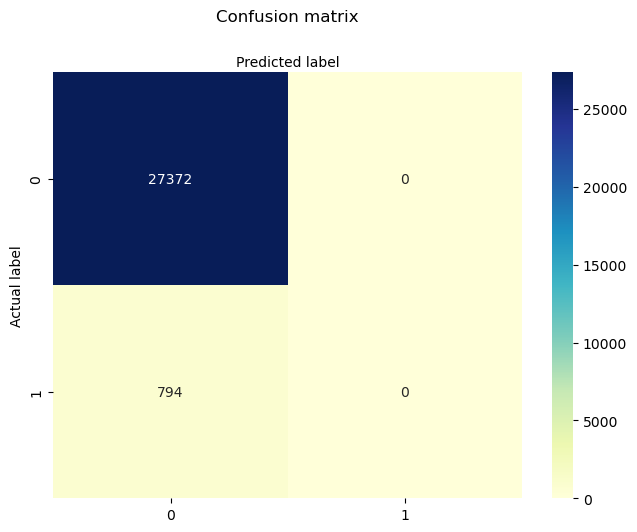

In [17]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show(1)

In [18]:
from sklearn.metrics import classification_report
target_names = ['without afli', 'with afli']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

without afli       0.97      1.00      0.99     27372
   with afli       0.00      0.00      0.00       794

    accuracy                           0.97     28166
   macro avg       0.49      0.50      0.49     28166
weighted avg       0.94      0.97      0.96     28166



C:\Users\Mathias\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mathias\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mathias\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


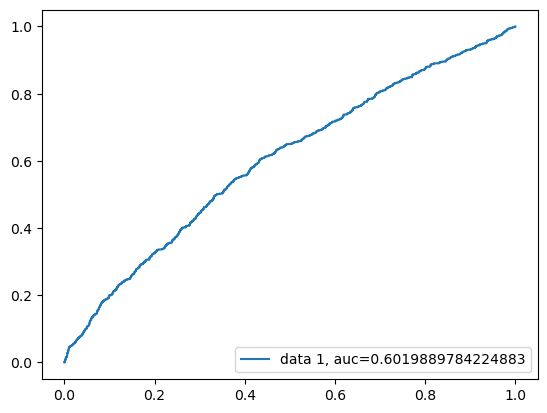

In [19]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Feature impotrance

In [20]:
feature_weights = logreg.coef_[0]

In [21]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_weights})

In [22]:
feature_importance = feature_importance.reindex(feature_importance.Importance.abs().sort_values(ascending=False).index)

In [23]:
print(feature_importance)

            Feature  Importance
14         rs4524_C    0.329348
13         rs4525_C   -0.325239
57  Affx.33347130_T    0.305928
74     rs59262400_A    0.286520
10         rs6030_C    0.240644
..              ...         ...
83  Affx.15525878_G   -0.012794
50     rs11244035_T    0.008132
9       rs2420371_G    0.007774
1      rs12736517_C   -0.007597
19      rs4696594_G    0.001265

[100 rows x 2 columns]


In [24]:
feature_importance.head(20)

,Feature,Importance
14,rs4524_C,0.329348
13,rs4525_C,-0.325239
57,Affx.33347130_T,0.305928
74,rs59262400_A,0.286520
10,rs6030_C,0.240644
24,rs6050_C,0.234128
75,rs35038435_A,-0.220833
4,rs75112989_A,0.203980
39,rs1593_T,-0.189009
29,rs2066865_A,0.187699


In [25]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

NameError: name 'y' is not defined

# Results, written

# Bootstrapping

In [26]:
from sklearn.utils import resample

In [27]:
model = LogisticRegression(random_state=16, max_iter=1000, solver='liblinear', penalty='l1')
model.fit(X_train, y_train)
original_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [28]:
n_iterations = 100
roc_aucs = []

In [29]:
for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train)
    
    model.fit(X_resampled, y_resampled)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    roc_aucs.append(auc)
    
lower = np.percentile(roc_aucs, 2.5)
upper = np.percentile(roc_aucs, 97.5)

print(f"Original ROC-AUC: {original_auc:.3f}")
print(f"95% Confidence Interval for ROC-AUC: ({lower:.3f}, {upper:.3f})")

Original ROC-AUC: 0.602
95% Confidence Interval for ROC-AUC: (0.596, 0.604)


In [22]:
original_auc

0.5963534966140545